In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

In [21]:
np.random.seed(3)
tf.random.set_seed(3)

train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True, # 수평 대칭 이미지를 50% 확률
                                  width_shift_range=0.1, # 전체 크기의 10% 범위에서 좌우로
                                  height_shift_range=0.1, # 마찬가지로 위, 아래 이동
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory('./train', # 학습셋이 있는 폴더 위치
                                                target_size=(150, 150),
                                                   batch_size=5,
                                                   class_mode='binary')

# 테스트 셋은 이미지 부풀리기 과정을 진행하지 않는다.
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('./test', # 테스트 셋이 있는 폴더 위치
                                                 target_size=(150, 150),
                                                 batch_size=5,
                                                 class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [22]:
# CNN 모델 적용
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))


In [28]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

history = model.fit_generator(
       train_generator,
       steps_per_epoch=30,
       epochs=50,
       validation_data=test_generator,
       validation_steps=len(test_generator)//5)


Epoch 1/50
30/30 [==============================] - 2s 78ms/step - loss: 0.3361 - accuracy: 0.8333 - val_loss: 0.2644 - val_accuracy: 0.9000
Epoch 2/50
30/30 [==============================] - 2s 71ms/step - loss: 0.2567 - accuracy: 0.9067 - val_loss: 0.1429 - val_accuracy: 0.9500
Epoch 3/50
30/30 [==============================] - 2s 72ms/step - loss: 0.2690 - accuracy: 0.8933 - val_loss: 0.1674 - val_accuracy: 0.9000
Epoch 4/50
30/30 [==============================] - 2s 74ms/step - loss: 0.2610 - accuracy: 0.9200 - val_loss: 0.2041 - val_accuracy: 0.9000
Epoch 5/50
30/30 [==============================] - 2s 72ms/step - loss: 0.1964 - accuracy: 0.9400 - val_loss: 0.0837 - val_accuracy: 1.0000
Epoch 6/50
30/30 [==============================] - 2s 73ms/step - loss: 0.2336 - accuracy: 0.8867 - val_loss: 0.2245 - val_accuracy: 0.9000
Epoch 7/50
30/30 [==============================] - 2s 72ms/step - loss: 0.1921 - accuracy: 0.9133 - val_loss: 0.1757 - val_accuracy: 0.9500
Epoch 8/50
30

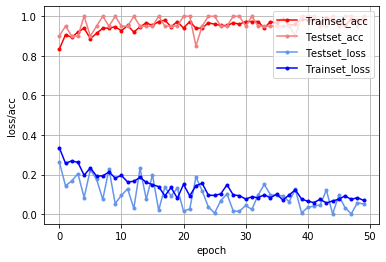

In [29]:
# 결과를 그래프로 표현하는 부분

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker = '.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker = '.', c='lightcoral', label='Testset_acc')
plt.plot(x_len, y_vloss, marker = '.', c='cornflowerblue', label='Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label='Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()